<a id="s"></a>

# <p style="background-color: #e54343; font-family: 'new times roman'; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 15px 50px; padding: 30px"> ☀ Part 2: Modeling ☀ </p>

<a href="#"> **Objective:** </a> The goal of this part is to find a model that generates the data of our studied phenomenon.

We will use the dataset named “data_for_modeling” from the first par


# Summary:

- <a href="#C0"> Importing Global Libraries </a>

- <a href="#C1"> Importing Data </a>

**Part II: Modeling**
 - <a href="#C21">II-1/ Data Split and Standardization</a>
 - <a href="#C22">II-2/ Grid Search: Finding the Best Model</a>
 - <a href="#C23">II-3/ Model Selection and Training</a>
 - <a href="#C24">II-4/ Scoring</a>
 - <a href="#C25">II-5/ Charts</a>

## <a name="#C0">Libraries Import</a>

In [1]:
# importation
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, r2_score

#
## <a name="#C1"> Importing Data </a>

In [2]:
df = pd.read_csv("../DATA/data_for_modeling.csv")

In [3]:
df

,day,month,flight,airline,class,from,dep_time,to,arr_time,stop,time_taken,price
0,11,2,1416,4,1,2,1,5,1,0,2.10,5953.0
1,11,2,1395,4,1,2,2,5,2,0,2.20,5953.0
2,11,2,1217,1,1,2,3,5,2,0,2.10,5956.0
3,11,2,1567,7,1,2,2,5,0,0,2.15,5955.0
4,11,2,1557,7,1,2,2,5,2,0,2.20,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
300254,31,3,1485,7,0,1,2,3,1,1,10.05,69265.0
300255,31,3,1489,7,0,1,0,3,3,1,10.25,77105.0
300256,31,3,1494,7,0,1,2,3,1,1,13.50,79099.0
300257,31,3,1491,7,0,1,2,3,1,1,10.00,81585.0


# 
## <a name="#C21">II-1/ Data Split and Standardization</a>

In this section, the work will involve:
  + Splitting my dataframe `df` into a matrix of `explanatory variables` and a `target variable`;
  + Standardizing the data using the `center and scale (mean/standard deviation)` method;
  + Finally, splitting into Train-Test.

#
Splitting into features and target variables

In [4]:
# Feature matrix
X = df.iloc[:, :-1].values

# Target vector
y = df[["price"]].values

Standardisation

In [5]:
# Instantiating the StandardScaler class
scaler_ml = StandardScaler()

# Standardization
X_std = scaler_ml.fit_transform(X)

# Dimensions
print(50 * "=")
print(f"Feature matrix dimensions: {X_std.shape}\n")
print(f"Target vector dimensions: {y.shape}")
print(50 * "=")


Feature matrix dimensions: (300259, 11)

Target vector dimensions: (300259, 1)


Train-Test Split

- `75%` for training.
- `25%` for testing.


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42)

# Dimensions
print(70 * "=")
print(f"Training dimensions: X_train ==> {X_train.shape} and y_train ==> {y_train.shape}\n")
print(f"Testing dimensions: X_test ==> {X_test.shape} and y_test ==> {y_test.shape}")
print(70 * "=")


Training dimensions: X_train ==> (225194, 11) and y_train ==> (225194, 1)

Testing dimensions: X_test ==> (75065, 11) and y_test ==> (75065, 1)


# 
## <a name="C22"> II-2/ Grid Search: Finding the Best Model </a>


This section involves iterating through several **machine learning algorithms** and their **hyperparameters** to find the algorithm that learns the best model for our data by evaluating the model on two axes: **score** and **complexity**.

Since I have a large amount of data, I will divide my **training set** into **training** and **validation sets** to evaluate these models.

In [7]:
# List to store performance metrics
perfs = []

# Dictionary of hyperparameters
params = {
    "Polynomial Regressor": [1, 2, 3, 4, 5],
    "KNeighborsRegressor" : [3, 5, 7, 9],
    "RandomForestRegressor" : [50, 100]
}

# Splitting the training data into training and validation sets
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

# Display dimensions
print(100 * "=")
print(f"Dimensions train: X_train ==> {X_train_.shape} !  y_train ==> {y_train_.shape}\n")
print(f"Dimensions validation: X_val ==> {X_val.shape} ! y_val ==> {y_val.shape}\n")
print(100 * "=")

# Loop to iterate through algorithms
for model in params.keys():
    
    # Display the algorithm currently running
    print(35 * "=", f"Running {model.upper()}", 34 * "=", "\n")
    
    # Polynomial regression case
    if model == "Polynomial Regressor":
        
        # Loop through hyperparameters (degrees)
        for i in params[model]:
            
            # Instantiation
            poly = PolynomialFeatures(degree=i)
            # Apply feature matrix transformation into combinations of features
            X_train_poly = poly.fit_transform(X_train_)
            X_val_poly = poly.fit_transform(X_val)
            
            # Training
            start = time.time()
            m = LinearRegression().fit(X_train_poly, y_train_)
            elapsed_time = time.time() - start
            
            # Prediction (evaluation)
            y_pred = m.predict(X_val_poly)
            
            # Metrics
            r2 = r2_score(y_pred, y_val)
            
            # Store performance metrics
            perfs.append((model, i, r2, elapsed_time))
            
            # Display performance metrics
            print(f"{model.upper()}: deg={i}, r2_score={r2}, time={elapsed_time}") 
            print(100 * "=")
            
    
    # KNN case
    elif model == "KNeighborsRegressor":
        
        # Loop through hyperparameters (number of neighbors)
        for i in params[model]:
            
            # Training
            start = time.time()
            m = KNeighborsRegressor(n_neighbors=i).fit(X_train_, y_train_)
            elapsed_time = time.time() - start
            
            # Prediction
            y_pred = m.predict(X_val)#
            
            # Metrics
            r2 = r2_score(y_pred, y_val)
            
            # Store performance metrics
            perfs.append((model, i, r2, elapsed_time))
            
            # Display performance metrics
            print(f"{model.upper()}: neighbors={i}, r2_score={r2}, time={elapsed_time}") 
            print(100 * "=")
            
    # RandomForestRegressor case
    elif model == "RandomForestRegressor":
        
        # Loop through estimators
        for i in params[model]:
            
            # Training
            start = time.time()
            m = RandomForestRegressor(n_estimators=i).fit(X_train_, y_train_.ravel())
            elapsed_time = time.time() - start
            
            # Prediction
            y_pred = m.predict(X_val)
            
            # Metrics
            r2 = r2_score(y_pred, y_val)
            
            # Store performance metrics
            perfs.append((model, i, r2, elapsed_time))
            
            # Display performance metrics
            print(f"{model.upper()}: n_estimators={i}, r2_score={r2}, time={elapsed_time}") 
            print(100 * "=")
            
    # Stochastic Gradient Descent case
    else:
        
        # Training
        start = time.time()
        m = SGDRegressor().fit(X_train_, y_train_)
        elapsed_time = time.time() - start

        # Prediction
        y_pred = m.predict(X_val)
        
        # Metrics
        r2 = r2_score(y_pred, y_val)
        
        # Store performance metrics
        perfs.append(("SGDRegressor", "", r2, elapsed_time))
        
        # Display performance metrics
        print(f"{model.upper()}: r2_score={r2}, time={elapsed_time}") 
        print(100 * "=")


Dimensions train: X_train ==> (180155, 11) !  y_train ==> (180155, 1)

Dimensions validation: X_val ==> (45039, 11) ! y_val ==> (45039, 1)

=================================== Running POLYNOMIAL REGRESSOR ================================== 

POLYNOMIAL REGRESSOR: deg=1, r2_score=0.8998369879259787, time=0.07813072204589844
POLYNOMIAL REGRESSOR: deg=2, r2_score=0.9382140095337084, time=0.48840785026550293
POLYNOMIAL REGRESSOR: deg=3, r2_score=0.949110547544389, time=4.791452884674072
POLYNOMIAL REGRESSOR: deg=4, r2_score=0.957852585446485, time=33.35894703865051
POLYNOMIAL REGRESSOR: deg=5, r2_score=0.9663760787936868, time=337.2569875717163
=================================== Running KNEIGHBORSREGRESSOR ================================== 

KNEIGHBORSREGRESSOR: neighbors=3, r2_score=0.9689584147725561, time=1.3460955619812012
KNEIGHBORSREGRESSOR: neighbors=5, r2_score=0.968601914002833, time=0.6030752658843994
KNEIGHBORSREGRESSOR: neighbors=7, r2_score=0.9682089888711239, time=0.7398736

We observe that the best model when analyzing the `performance` and `complexity` axes is the **`K-nearest neighbors (KNN) algorithm with k = 5`**. Therefore, for the modeling, we will choose it.

# 
## <a name="C23"> II-3/ Best Model: KNeighborsRegressor with `K=3` </a>

Here, we have selected the `KNN` model, and we need to retrain it on all the training data and then evaluate it on the test data, which has not been used before.

- Training

In [8]:
# dimensions 
print(70 * "=")
print(f"Dimensions train: X_tarin ==> {X_train.shape} !  y_train ==> {y_train.shape}\n")
print(f"Dimensions validation:  X_test ==> {X_test.shape}  !   y_test ==> {y_test.shape}") 
print(70 * "=") 

Dimensions train: X_tarin ==> (225194, 11) !  y_train ==> (225194, 1)

Dimensions validation:  X_test ==> (75065, 11)  !   y_test ==> (75065, 1)


In [9]:
# training
best_model = KNeighborsRegressor(n_neighbors=3, metric='euclidean').fit(X_train, y_train)

# prediction
y_pred = best_model.predict(X_test)

## <a name="C24"> II-1/ Scoring </a>

In this section, I evaluate the model using the following metrics:
- Root Mean Square Error (RMSE);
- Mean Absolute Error (MAE);
- R^2-Score (R-squared score).

In [10]:
# Calculation of MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculation of R^2
r2 = int(np.round(r2_score(y_test, y_pred),2)*100)

# Displaying the optimal results
print(70 * "=")
print(f"Root Mean Squared Error (RMSE) = {int(rmse)}") 
print(f"Mean Absolute Error (MAE) = {int(mae)}")
print(f"R^2 score (R) = {r2}%")
print(70 * "=")

Root Mean Squared Error (RMSE) = 3841
Mean Absolute Error (MAE) = 1833
R^2 score (R) = 97%


## <a name="C25"> II-2/ Graphics </a>

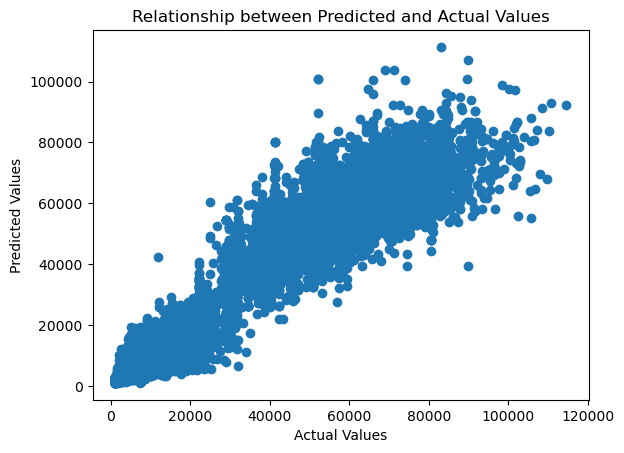

In [11]:
#Scatter plot between actual and predicted values to see if they are highly correlated
plt.scatter(y_test, y_pred)
plt.title("Relationship between Predicted and Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()